In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load data
df = pd.read_csv("/content/StudentsPerformance.csv")

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

In [12]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


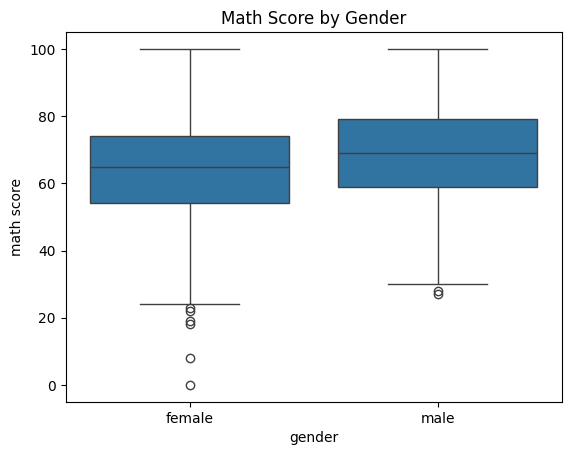

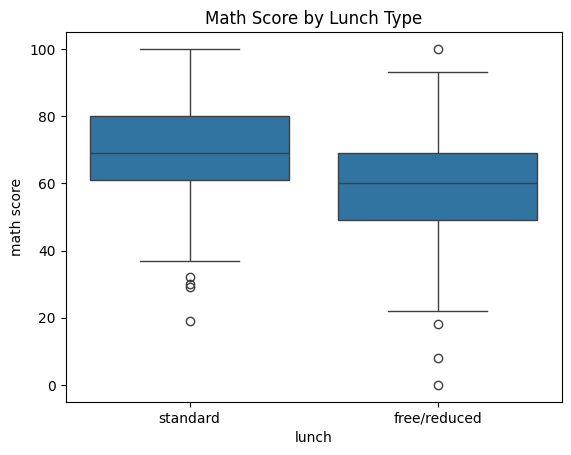

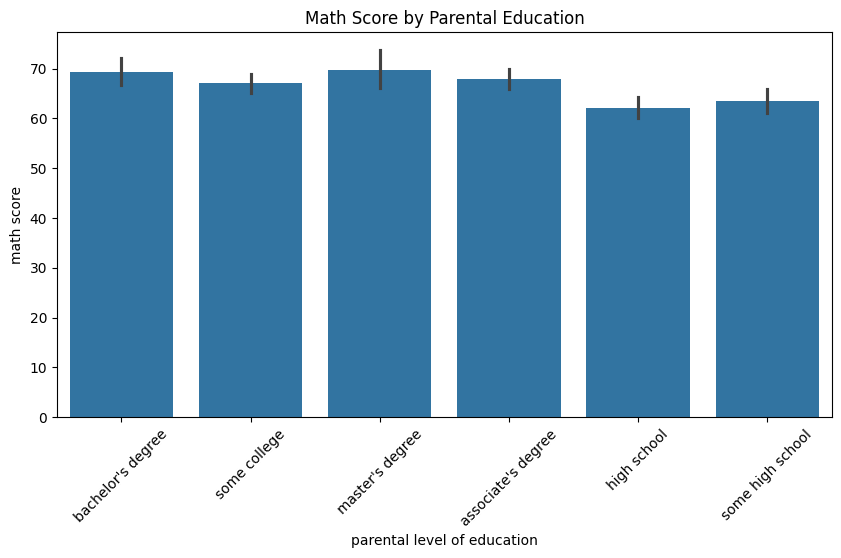

In [26]:
# Gender vs Math Score
sns.boxplot(x='gender', y='math score', data=df)
plt.title("Math Score by Gender")
plt.savefig("gender_vs_math_score.png")
plt.show()

# Lunch vs Math Score
sns.boxplot(x='lunch', y='math score', data=df)
plt.title("Math Score by Lunch Type")
plt.savefig("lunch_vs_math_score.png")
plt.show()

# Parental Education vs Math Score
plt.figure(figsize=(10, 5))
sns.barplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title("Math Score by Parental Education")
plt.savefig("parental level of education_vs_math_score.png")
plt.show()

In [6]:
# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [7]:
# Split data
X = df_encoded.drop("math score", axis=1)
y = df_encoded["math score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
# Results
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.8804332983749565
MSE: 29.095169866715487


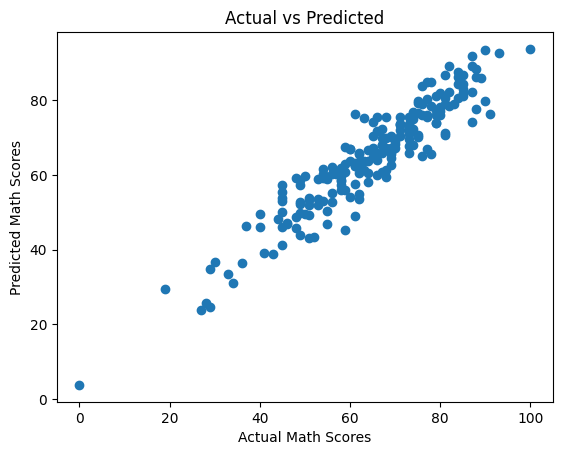

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted")
plt.show()